In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import sklearn as sk
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [55]:
# identificar  null values in waterfront and year_renovated
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [56]:
df.waterfront.isnull().sum()

2376

In [57]:
# # look at the first 20 rows
df['waterfront'] = df.waterfront.fillna(0.0)

In [58]:
# check for null values
df.waterfront.isnull().sum()

0

In [59]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

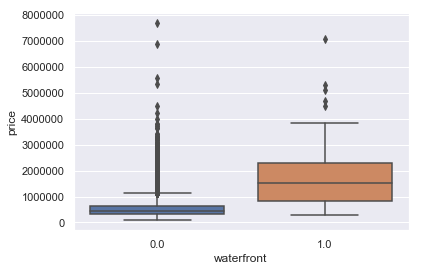

In [60]:
# waterfron has many outliyers
sns.boxplot(x="waterfront", y="price",
           
            data=df)

In [61]:
#take care of null values
df.yr_renovated.isnull().sum()

3842

In [62]:
# df.yr_renovated.value_counts()

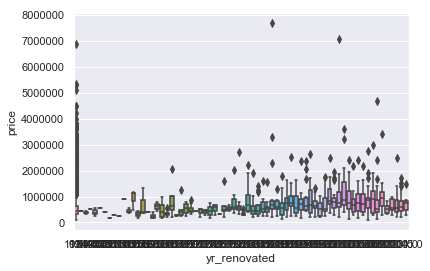

In [63]:
sns.boxplot(x="yr_renovated", y="price",data=df)

In [64]:

df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [65]:
df['yr_renovated'] = df.yr_renovated.fillna(0)

In [66]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [67]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [68]:
df['view'] = df.view.fillna(0.0)

In [4]:
# I want to create a function that take null values from a list of columsnand conver them to 0
def na_to_zeros(df,list_of_columns):
    df[list_of_columns] = df[list_of_columns].fillna(0.0)
    return df[list_of_columns]

In [5]:
na_to_zeros(df , ['waterfront','view','yr_renovated'])

,waterfront,view,yr_renovated
0,0.0,0.0,0.0
1,0.0,0.0,1991.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [75]:
df.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1219f1908>,
      dtype=object)

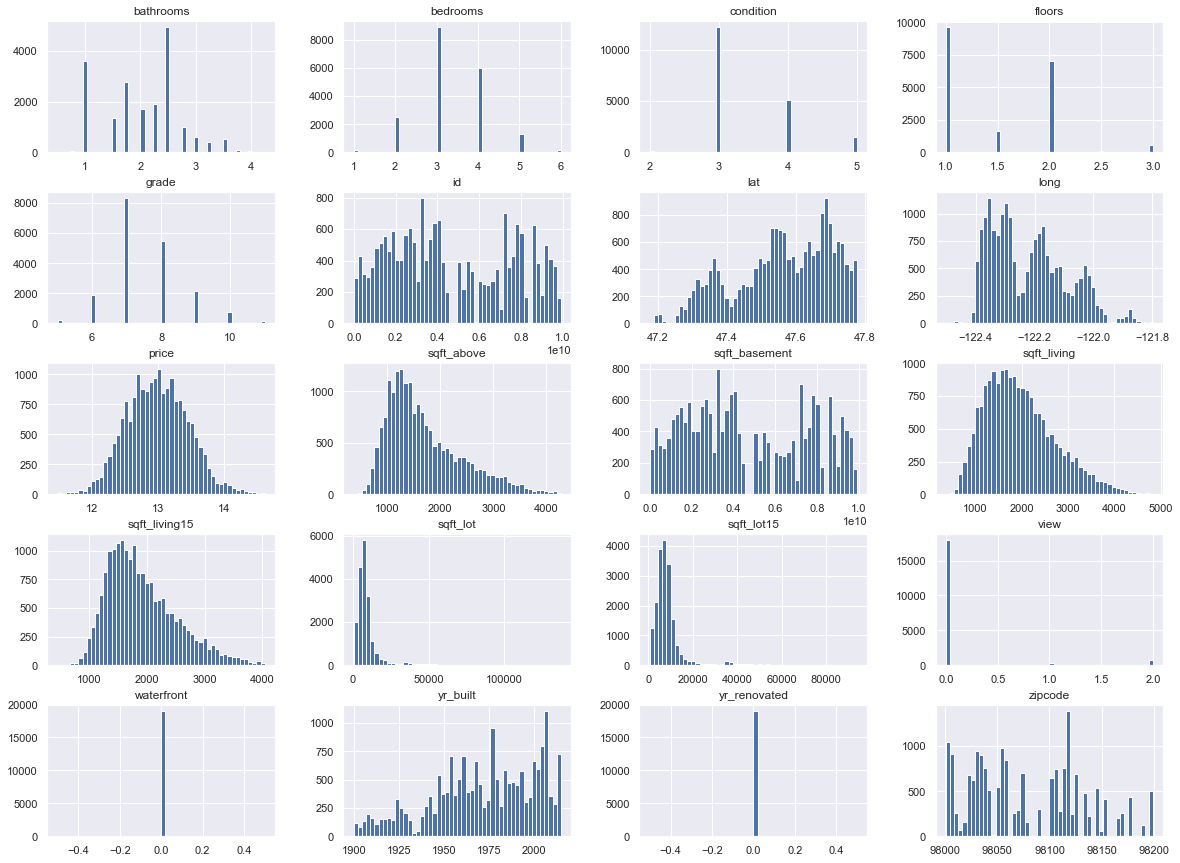

In [143]:
df.hist(bins=50, figsize=(20,15))


In [77]:
# I took care of null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [94]:
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [146]:
#BASEMENT cleaning data
df.sqft_basement = df.replace('?', 'NA')

In [147]:
df.sqft_basement = df.sqft_basement.astype('int')

In [148]:
df.sqft_basement.isnull().sum()

0

In [85]:
# formmula to check for outliers retrun a df with the rows with ouliyers
outliers = df[df['bathrooms'] > df['bathrooms'].mean() + 3 * df['bathrooms'].std()]
outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
270,4054500390,10/7/2014,14.130321,4,4.75,5310,57346,2.0,0.0,0.0,...,11,5310,0.0,1989,0.0,98077,47.7285,-122.042,4180,47443
300,3225069065,6/24/2014,14.940440,4,5.00,4550,18641,1.0,1.0,4.0,...,10,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
450,4055700030,5/2/2015,14.187074,3,4.50,3970,24920,2.0,0.0,2.0,...,10,3260,710.0,1977,0.0,98034,47.7183,-122.258,2610,13838
527,3225079035,6/18/2014,14.285514,6,5.00,6050,230652,2.0,0.0,3.0,...,11,6050,0.0,2001,0.0,98024,47.6033,-121.943,4210,233971
1054,5416300240,2/2/2015,13.748302,4,4.50,5670,84267,2.0,0.0,2.0,...,11,5670,0.0,2008,0.0,98010,47.3230,-122.044,4100,83729
1099,7237500390,11/10/2014,14.266586,5,4.50,6070,14731,2.0,0.0,0.0,...,11,6070,0.0,2004,0.0,98059,47.5306,-122.134,4750,13404
1121,293760310,7/11/2014,13.790193,5,4.50,4300,12250,2.0,0.0,0.0,...,10,4300,0.0,2004,0.0,98029,47.5557,-122.027,3950,12250
1161,3876100320,9/5/2014,13.086736,6,4.50,2940,7500,1.5,0.0,0.0,...,8,2940,0.0,1966,0.0,98034,47.7208,-122.182,2010,7500
1162,1247600105,10/20/2014,15.446710,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788


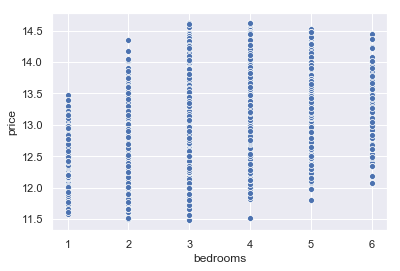

In [135]:
# use the function regplot to make a scatterplot to see outliyes
sns.scatterplot(x=df["bedrooms"], y=df["price"])



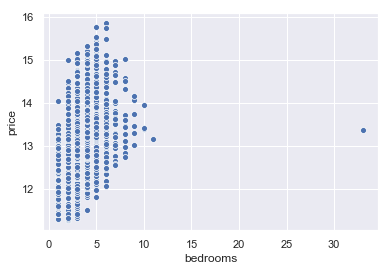

In [136]:
sns.scatterplot(x=df_copy["bedrooms"], y=df_copy["price"])


1321400060

In [111]:
df.sqft_basement = df.sqft_basement.astype('int')




In [121]:
df_copy = df.drop(['date'] , axis = 1)# from scipy import stats
df_copy[(np.abs(stats.zscore(df_copy)) < 3).all(axis=1)]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,12.309982,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,7129300520,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,12.100712,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,5631500400,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,13.311329,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,2487200875,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1954400510,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,12.458775,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1321400060,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,12.583995,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,2008000270,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,12.343658,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,2414600126,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,12.685408,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,3793500160,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,13.403776,3,2.50,3560,9796,1.0,0.0,0.0,3,8,1860,1736800520,1965,0.0,98007,47.6007,-122.145,2210,8925
11,9212900260,13.056224,2,1.00,1160,6000,1.0,0.0,0.0,4,7,860,9212900260,1942,0.0,98115,47.6900,-122.292,1330,6000


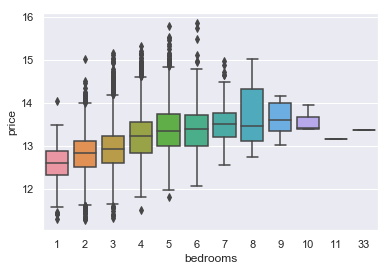

In [123]:
sns.boxplot(x="bedrooms", y="price",data=df_copy)

In [125]:
df = df[(np.abs(stats.zscore(df.select_dtypes(exclude='object'))) < 3).all(axis=1)]


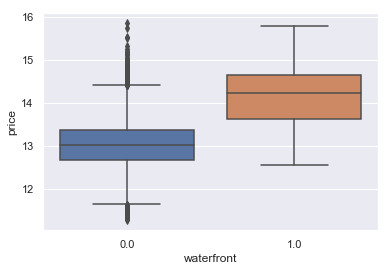

In [129]:
sns.boxplot(x="waterfront", y="price",
           
            data=df_copy)

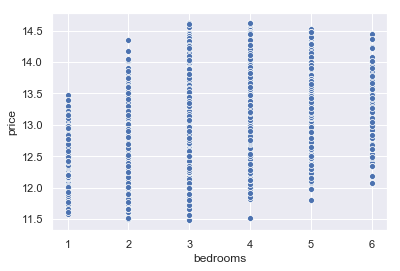

In [134]:
sns.scatterplot(x=df["bedrooms"], y=df["price"])


In [71]:
df.price= np.log(df.price)

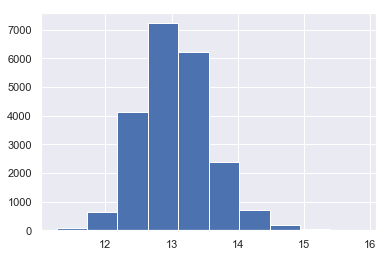

In [72]:
df.price.hist()

In [14]:
def normalized(dataframe):
    for col in dataframe:
        if col == ['price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
            dataframe = np.log(daframe.col)
    return dataframe

In [15]:
df_n = normalized(df)

In [17]:
df['price'] = np.log(df.price)
    


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eeac358>,
      dtype=object)

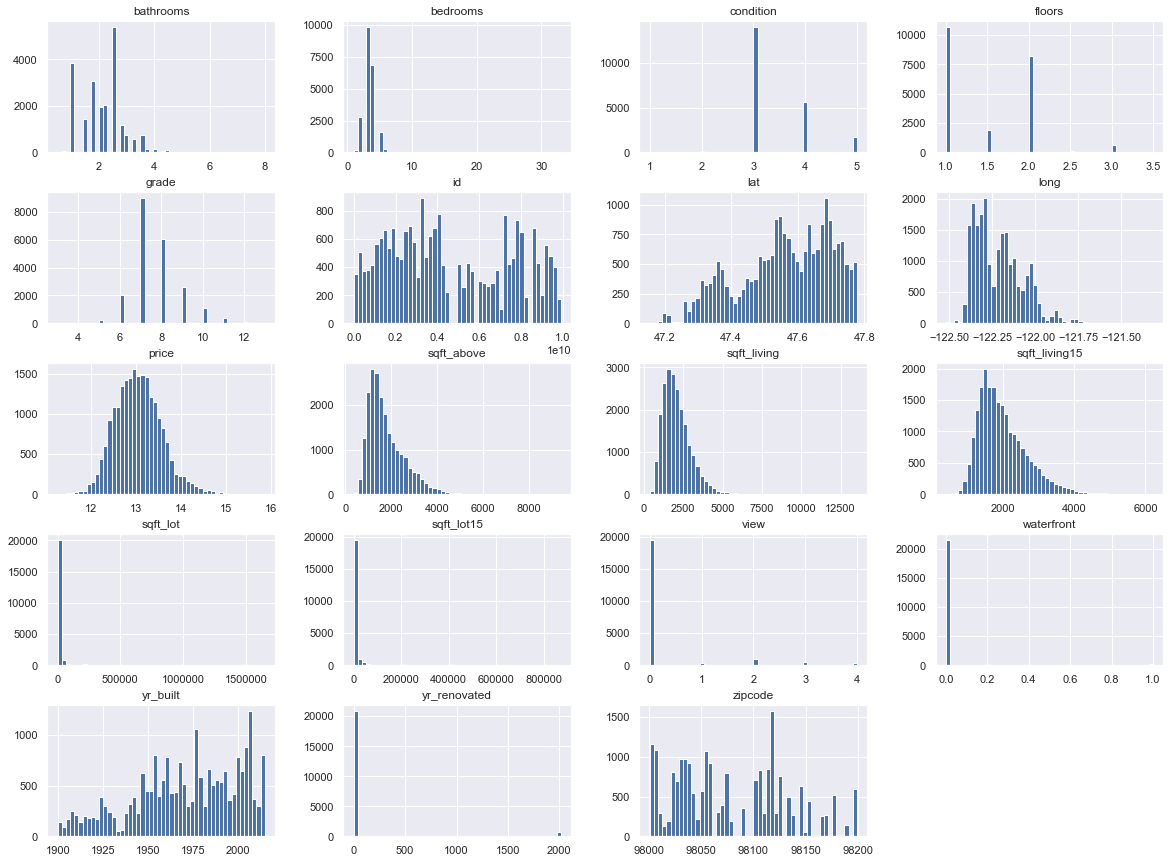

In [19]:
df.hist(bins=50, figsize=(20,15))
